In [4]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras

Using TensorFlow backend.


In [5]:
#Importing the dataset
training_data = pd.read_csv('Dataset/fashion-mnist_train.csv', sep = ',')
test_data = pd.read_csv('Dataset/fashion-mnist_test.csv', sep = ',')

In [6]:
#Visualising dataset
training_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
training_data.shape

(60000, 785)

In [8]:
test_data.shape

(10000, 785)

In [9]:
training  = np.array(training_data,dtype = 'float32')

In [11]:
test = np.array(test_data,dtype = 'float32')

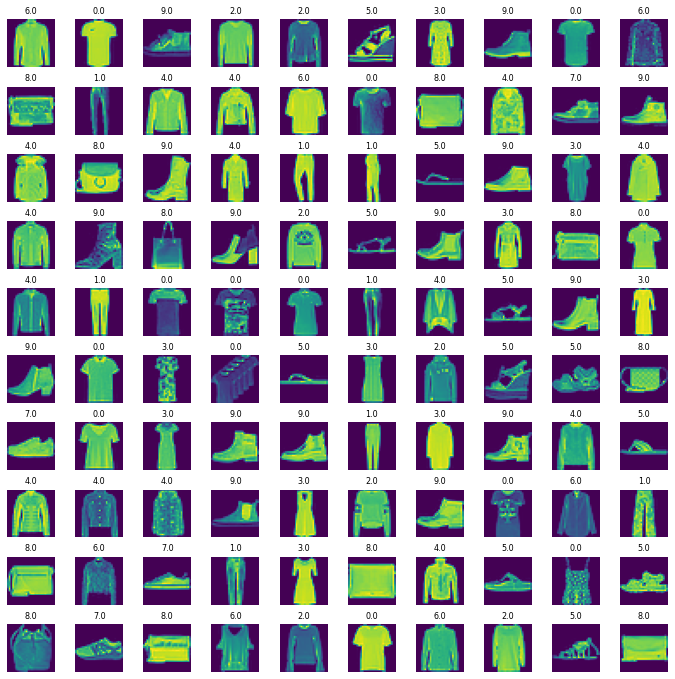

In [12]:
import random
row = 10
col = 10
fig, axes = plt.subplots(row,col,figsize = (12,12))
axes = axes.ravel()  #to flatten the 15x15 matrix into array of size 225 
for l in range(row*col):
    i = random.randint(1,60000)
    axes[l].imshow(training[i,1:].reshape(28,28))
    axes[l].set_title(training[i,0],fontsize=8)
    axes[l].axis('off')
plt.subplots_adjust(hspace=0.4)

In [14]:
#Training the model
xTrain = training[:,1:]/255
yTrain = training[:,0]

xTest = test[:,1:]/255
yTest = test[:,0]

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_validate, Y_train, Y_validate = train_test_split(xTrain,yTrain,test_size = 0.2, random_state = 12345)

In [27]:
X_train.shape[0]

48000

In [26]:
X_validate.shape

(12000, 784)

In [37]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_test = xTest.reshape(xTest.shape[0],28,28,1)
X_validate = X_validate.reshape(X_validate.shape[0],28,28,1)

In [38]:
X_train.shape

(48000, 28, 28, 1)

In [39]:
X_test.shape

(10000, 28, 28, 1)

In [40]:
X_validate.shape

(12000, 28, 28, 1)

In [42]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [43]:
model =Sequential()

In [44]:
model.add(Conv2D(32,3,3, input_shape = (28,28,1), activation = 'relu'))

C:\Users\amitm\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1..., activation="relu")`
  """Entry point for launching an IPython kernel.


In [45]:
model.add(MaxPooling2D(pool_size = (2,2)))

In [46]:
model.add(Flatten())

In [47]:
model.add(Dense(output_dim = 32,activation = 'relu'))

C:\Users\amitm\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=32)`
  """Entry point for launching an IPython kernel.


In [48]:
model.add(Dense(output_dim = 10,activation = 'sigmoid'))

C:\Users\amitm\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=10)`
  """Entry point for launching an IPython kernel.


In [49]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(lr=0.001),metrics = ['accuracy'])

In [50]:
epochs = 50

In [51]:
model.fit(X_train,
          Y_train,
          batch_size = 512,
          epochs = epochs,
          verbose = 1,
          validation_data = (X_validate,Y_validate)
         )

C:\Users\amitm\Anaconda3\envs\tensor\lib\site-packages\ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 12s 256us/step - loss: 0.9047 - accuracy: 0.7256 - val_loss: 0.4851 - val_accuracy: 0.8288
Epoch 2/50
48000/48000 [==============================] - 12s 240us/step - loss: 0.4492 - accuracy: 0.8430 - val_loss: 0.4176 - val_accuracy: 0.8545
Epoch 3/50
48000/48000 [==============================] - 12s 241us/step - loss: 0.3919 - accuracy: 0.8634 - val_loss: 0.3621 - val_accuracy: 0.8743
Epoch 4/50
48000/48000 [==============================] - 12s 240us/step - loss: 0.3577 - accuracy: 0.8742 - val_loss: 0.3542 - val_accuracy: 0.8768
Epoch 5/50
48000/48000 [==============================] - 12s 240us/step - loss: 0.3378 - accuracy: 0.8799 - val_loss: 0.3293 - val_accuracy: 0.8862
Epoch 6/50
48000/48000 [==============================] - 12s 250us/step - loss: 0.3173 - accuracy: 0.8890 - val_loss: 0.3158 - val_accuracy: 0.8883
Epoch 7/50
48000/48000 [==============================] 

In [57]:
#Evaluating model
evaluation = model.evaluate(X_test,yTest)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

10000/10000 [==============================] - 1s 99us/step
Test Accuracy : 0.911


In [59]:
predict_classes = model.predict_classes(X_test)

In [60]:
predict_classes

array([0, 1, 6, ..., 8, 8, 1], dtype=int64)

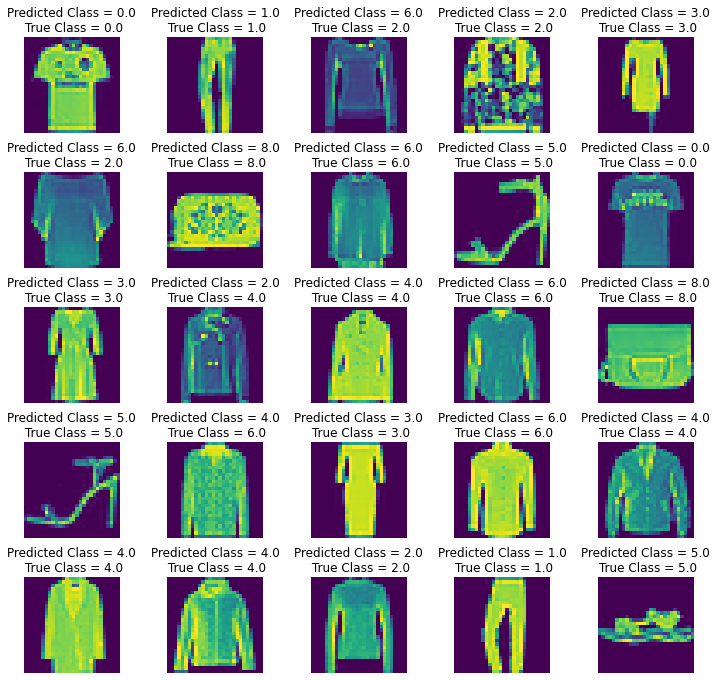

In [68]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()

for i in range(L*W):
    axes[i].imshow(X_test[i].reshape(28,28))
    axes[i].set_title("Predicted Class = {:0.1f}\n True Class = {:0.1f}".format(predict_classes[i],yTest[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

<AxesSubplot:>

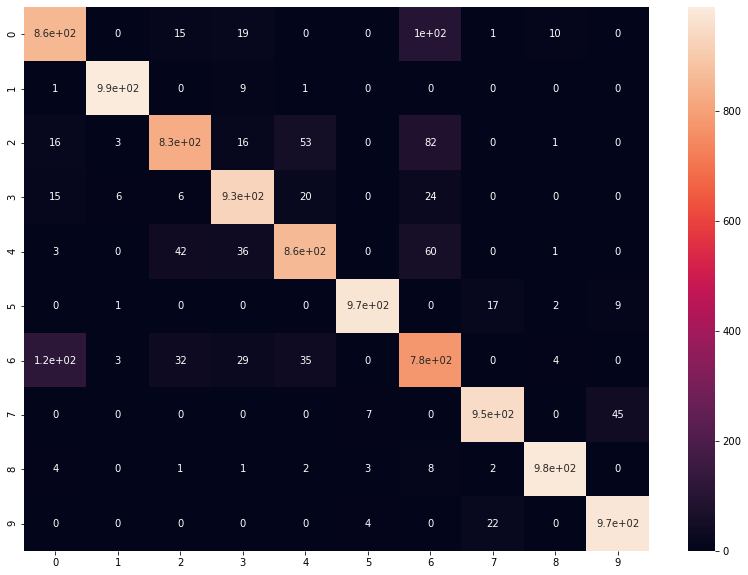

In [69]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(yTest,predict_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm,annot=True)


In [70]:
from sklearn.metrics import classification_report
no_classes = 10
target_names = ["Class {}".format(i) for i in range(no_classes)]
print(classification_report(yTest,predict_classes,target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.85      0.85      0.85      1000
     Class 1       0.99      0.99      0.99      1000
     Class 2       0.90      0.83      0.86      1000
     Class 3       0.89      0.93      0.91      1000
     Class 4       0.89      0.86      0.87      1000
     Class 5       0.99      0.97      0.98      1000
     Class 6       0.74      0.78      0.76      1000
     Class 7       0.96      0.95      0.95      1000
     Class 8       0.98      0.98      0.98      1000
     Class 9       0.95      0.97      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

